# Compare CCL against benchmarks
This notebook performs comparisons of CCL against our benchmarks for different cosmological quantities. These plots are presented in the CCL paper. Benchmarks are documented in the CCL wiki: https://github.com/LSSTDESC/CCL/wiki/Benchmarks

In [2]:
import numpy as np
import pylab as plt
import pyccl as ccl
%matplotlib inline

### Set up the benchmark cosmologies 
`Cosmology` objects contain the parameters and metadata needed as inputs to most functions. Each `Cosmology` object has a set of cosmological parameters attached to it. In this example, we will only use the parameters of a vanilla LCDM model, but simple extensions (like curvature, neutrino mass, and w0/wa) are also supported.

`Cosmology` objects also contain precomputed data (e.g. splines) to help speed-up certain calculations. As such, `Cosmology` objects are supposed to be immutable; you should create a new `Cosmology` object when you want to change the values of any cosmological parameters.

The cosmologies we are setting up at this stage are documented in the CCL paper, Table 2. With the following plots, we verify the level of accuracy stated in Table 3.

In [2]:
params_ccl1=ccl.Parameters(Omega_c=0.25, Omega_b=0.05, h=0.7, A_s = 2.1e-9, n_s=0.96, Neff=0)
#Ensure Omega_g and Omega_l have the right values, overwriting fiducials from ccl.Parameters
params_ccl1.parameters.Omega_g =0.
params_ccl1.parameters.Omega_l =0.7
#Only now that parameters are correct we can set up the cosmology
cosmo_ccl1 = ccl.Cosmology(params_ccl1)
params_ccl2=ccl.Parameters(Omega_c=0.25, Omega_b=0.05, h=0.7, A_s = 2.1e-9, n_s=0.96, w0=-0.9, Neff=0)
params_ccl2.parameters.Omega_g =0.
params_ccl2.parameters.Omega_l =0.7
cosmo_ccl2 = ccl.Cosmology(params_ccl2)
params_ccl3=ccl.Parameters(Omega_c=0.25, Omega_b=0.05, h=0.7, A_s = 2.1e-9, n_s=0.96, w0=-0.9, wa=0.1, Neff=0)
params_ccl3.parameters.Omega_g =0.
params_ccl3.parameters.Omega_l =0.7
cosmo_ccl3 = ccl.Cosmology(params_ccl3)
params_ccl4=ccl.Parameters(Omega_c=0.25, Omega_b=0.05, Omega_k=0.05, h=0.7, A_s = 2.1e-9, n_s=0.96, w0=-0.9, wa=0.1, Neff=0)
params_ccl4.parameters.Omega_g =0.
params_ccl4.parameters.Omega_l =0.65
cosmo_ccl4 = ccl.Cosmology(params_ccl4)
params_ccl5=ccl.Parameters(Omega_c=0.25, Omega_b=0.05, Omega_k=-0.05, h=0.7, A_s = 2.1e-9, n_s=0.96, w0=-0.9, wa=0.1, Neff=0)
params_ccl5.parameters.Omega_g =0.
params_ccl5.parameters.Omega_l =0.75
cosmo_ccl5 = ccl.Cosmology(params_ccl5)
params_ccl6=ccl.Parameters(Omega_c=0.3, Omega_b=0.0, h=0.7, A_s = 2.1e-9, n_s=0.96, Neff=0)
params_ccl6.parameters.Omega_g =0.
params_ccl6.parameters.Omega_l =0.75
cosmo_ccl6= ccl.Cosmology(params_ccl6)
cosmo_list=[cosmo_ccl1,cosmo_ccl2,cosmo_ccl3,cosmo_ccl4,cosmo_ccl5,cosmo_ccl6]
num_models=5
cosmo_list_hiz=[cosmo_ccl1,cosmo_ccl2,cosmo_ccl3]
num_models_hiz =3

### Cosmological Distances

With the cosmologies set up, we will not compute comoving radial distances and compare them to our input benchmark files. First, let's load the benchmark file. The format is: (z,d1,d2,d3,d4,d5) where z is the redshift, d are distances and 1-5 refers to the cosmologies set up above. The units are Mpc/h.

In [3]:
bench=np.loadtxt('../tests/benchmark/chi_model1-5.txt')
z=bench[1:,0]
d_bench=bench[1:,1:]
scale_fact=1./(1+z)

Now let's calculate CCL predictions to compare against the benchmark. Notice CCL returns quantities in units of Mpc.

In [4]:
d_ccl = np.zeros((len(z),num_models))
for i in range(num_models):
    d_ccl[:,i]=ccl.comoving_radial_distance(cosmo_list[i],scale_fact)*(cosmo_list[i])['h']

And we will now make a plot comparing the two quantities.

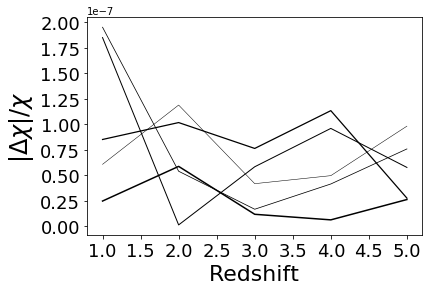

<Figure size 432x288 with 0 Axes>

In [5]:
plt.figure()
plt.ylabel(r'$|\Delta\chi|/\chi$',fontsize=24)
plt.xlabel('Redshift',fontsize=22)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
for i in range(0,5):
    plt.plot(z,np.abs(d_bench[:,i]/d_ccl[:,i]-1),'k-',lw=i*0.25+0.5)
    #plt.plot(z, 1e-4*z/z, linestyle='--', color='r')
plt.show()
plt.clf()

### Cosmological distances (high z)

In [6]:
bench=np.loadtxt('../tests/benchmark/chi_hiz_model1-3.txt')
z=bench[1:,0]
d_hiz_bench=bench[1:,1:]
scale_fact=1./(1+z)
d_hiz_ccl = np.zeros((len(z),num_models_hiz))

for i in range(num_models_hiz):
    d_hiz_ccl[:,i]=ccl.comoving_radial_distance(cosmo_list_hiz[i],scale_fact)*(cosmo_list[i])['h']

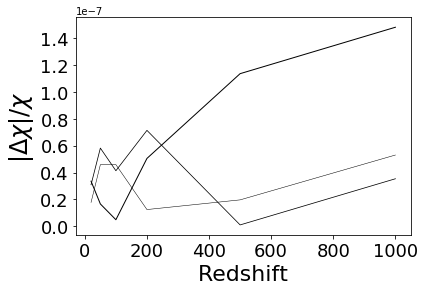

<Figure size 432x288 with 0 Axes>

In [8]:
plt.figure()
plt.ylabel(r'$|\Delta\chi|/\chi$',fontsize=24)
plt.xlabel('Redshift',fontsize=22)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
for i in range(0,num_models_hiz):
    plt.plot(z,np.abs(d_hiz_bench[:,i]/d_hiz_ccl[:,i]-1),'k-',lw=i*0.25+0.5)
    #plt.plot(z, 1e-4*z/z, linestyle='--', color='r')
plt.show()
plt.clf()

### Cosmological Emulator - case with no neutrinos

We first load the emulator cosmologies. Among them, we will only use models: 1,3,5,6,8,10. We will compare to CCL at z=0. The requirement is a fracional discrepancy lower than 3%. This is the tolerance we have required based on the emulator paper results (Section 3.3, Fig 6). 

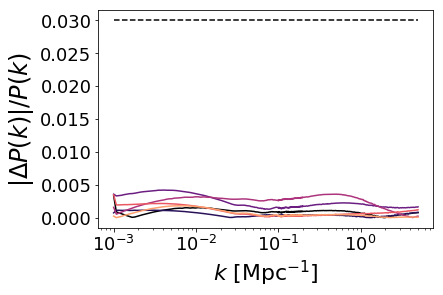

<Figure size 432x288 with 0 Axes>

In [41]:
emu_cosmo_mat=np.loadtxt('../tests/benchmark/emu_cosmologies.txt')
Omega_c_emu=emu_cosmo_mat[:,0]
Omega_b_emu=emu_cosmo_mat[:,1]
h_emu=emu_cosmo_mat[:,2]
sigma8_emu=emu_cosmo_mat[:,3]
ns_emu=emu_cosmo_mat[:,4]
w0_emu=emu_cosmo_mat[:,5]
wa_emu=emu_cosmo_mat[:,6]
models = np.array([1,3,5,6,8,10])
colvec=plt.cm.magma(np.linspace(0,0.8,len(models)))
plt.figure()
plt.ylabel(r'$|\Delta P(k)|/P(k)$',fontsize=24)
plt.xlabel(r'$k$ [Mpc$^{-1}$]',fontsize=22)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.gca().set_xscale('log')
for i_model in range(0,len(models)):
    params_emu=ccl.Parameters(Omega_c=Omega_c_emu[i_model], Omega_b=Omega_b_emu[i_model], h=h_emu[i_model], 
                              sigma8 = sigma8_emu[i_model], n_s=ns_emu[i_model], w0=w0_emu[i_model], wa=wa_emu[i_model],Neff=3.04)
    params_emu.parameters.Omega_l=params_emu.parameters.Omega_l+params_emu.parameters.Omega_g
    params_emu.parameters.Omega_g =0.
    cosmo_emu = ccl.Cosmology(params_emu,transfer_function='emulator',matter_power_spectrum='emu')
    pk_emu=np.loadtxt("../tests/benchmark/emu_smooth_pk_M"+str(models[i_model])+".txt")
    pk_ccl=ccl.nonlin_matter_power(cosmo_emu,pk_emu[:,0],1.)
    plt.plot(pk_emu[:,0],np.abs(pk_ccl/pk_emu[:,1]-1.),'-',color=colvec[i_model])
    
plt.plot(pk_emu[:,0],np.ones(len(pk_emu[:,0]))*3e-2,'k--')    
plt.show()
plt.clf()

### Cosmological Emulator - with neutrinos

Similar to the case above, but for cosmologies with neutrinos.

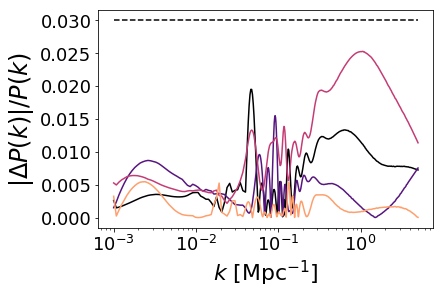

<Figure size 432x288 with 0 Axes>

In [42]:
emu_cosmo_mat=np.loadtxt('../tests/benchmark/emu_nu_cosmologies.txt')
Omega_c_emu=emu_cosmo_mat[:,0]
Omega_b_emu=emu_cosmo_mat[:,1]
h_emu=emu_cosmo_mat[:,2]
sigma8_emu=emu_cosmo_mat[:,3]
ns_emu=emu_cosmo_mat[:,4]
w0_emu=emu_cosmo_mat[:,5]
wa_emu=emu_cosmo_mat[:,6]
Omega_nu_emu=emu_cosmo_mat[:,7]
models = np.array([38,39,40,42])
colvec=plt.cm.magma(np.linspace(0,0.8,len(models)))
plt.figure()
plt.ylabel(r'$|\Delta P(k)|/P(k)$',fontsize=24)
plt.xlabel(r'$k$ [Mpc$^{-1}$]',fontsize=22)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.gca().set_xscale('log')
for i_model in range(0,len(models)):
    #Figure out the neutrino mass for this Omega_nu:
    Mnu_out = ccl.nu_masses(Omega_nu_emu[i_model]*h_emu[i_model]**2, 'equal', 2.725)
    params_emu=ccl.Parameters(Omega_c=Omega_c_emu[i_model], Omega_b=Omega_b_emu[i_model], h=h_emu[i_model], 
                              sigma8 = sigma8_emu[i_model],m_nu=Mnu_out, n_s=ns_emu[i_model], w0=w0_emu[i_model], 
                              wa=wa_emu[i_model],Neff=3.04)
    params_emu.parameters.Omega_l=params_emu.parameters.Omega_l+params_emu.parameters.Omega_g
    params_emu.parameters.Omega_g =0.
    cosmo_emu = ccl.Cosmology(params_emu,transfer_function='emulator',matter_power_spectrum='emu')
    pk_emu=np.loadtxt("../tests/benchmark/emu_nu_smooth_pk_M"+str(models[i_model])+".txt")
    pk_ccl=ccl.nonlin_matter_power(cosmo_emu,pk_emu[:,0],1.)
    plt.plot(pk_emu[:,0],np.abs(pk_ccl/pk_emu[:,1]-1.),'-',color=colvec[i_model])
    
plt.plot(pk_emu[:,0],np.ones(len(pk_emu[:,0]))*3e-2,'k--')    
plt.show()
plt.clf()

### To-do: ensure all plots match the level of accuracy of Table 3.

### To-do: repeat the same exercise above test by test for all entries in Table 3. This can be done looking at the .c files in tests/

### Growth function (low z)

In [9]:
bench=np.loadtxt('../tests/benchmark/growth_model1-5.txt')
z=bench[0:,0]
g_bench=bench[0:,1:]
scale_fact=1./(1+z)
g_ccl = np.zeros((len(z),num_models))
for i in range(0,num_models):
    g_ccl[:,i]=ccl.growth_factor(cosmo_list[i],scale_fact)


/Users/chisarie/myVirtualenv-2/lib/python2.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in divide
  


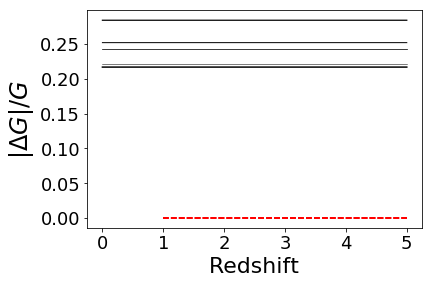

<Figure size 432x288 with 0 Axes>

In [10]:
plt.figure()
plt.ylabel(r'$|\Delta G|/G$',fontsize=24)
plt.xlabel('Redshift',fontsize=22)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
for i in range(0,5):
    plt.plot(z,np.abs(g_bench[:,i]/g_ccl[:,i]-1),'k-',lw=i*0.25+0.5)
    plt.plot(z, 1e-4*z/z, linestyle='--', color='r')
plt.show()
plt.clf()

### Growth function (high z)

In [ ]:

bench=np.loadtxt('../tests/benchmark/growth_hiz_model1-3.txt')
z=bench[0:,0]
num_z = np.shape(bench)[0]
g_hiz_bench=bench[0:,1:]
scale_fact=1./(1+z)

In [ ]:
g_hiz_ccl = np.zeros((num_z, num_models_hiz))
for i in range(num_models_hiz):
    g_hiz_ccl[:,i]=ccl.growth_factor(cosmo_list_hiz[i],scale_fact)

In [ ]:
plt.figure()
plt.ylabel(r'$|\Delta G|/G$',fontsize=24)
plt.xlabel('Redshift',fontsize=22)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
for i in range(num_models_hiz):
    plt.plot(z,np.abs(g_hiz_bench[:,i]/g_hiz_ccl[:,i]-1),'k-',lw=i*0.25+0.5)
    plt.plot(z, 1e-4*z/z, linestyle='--', color='r')
plt.show()
plt.clf()

### Testing Mass function

In [ ]:
bench=np.loadtxt('../tests/benchmark/model1_hmf.txt')
z = bench[0:,0]
sigma = bench[0:,1]
invsigma = bench[0:,2]
massfunc = bench[0:,3]

mass = 1e10

plt.plot(z, np.abs(ccl.sigmaM(cosmo_ccl1,mass,scale_fact)/sigma-1))
         
#double absolute_tolerance = SIGMA_TOLERANCE*data->massfunc[0][j];
#    if (fabs(absolute_tolerance)<1e-12) absolute_tolerance = 1e-12;
#    ASSERT_DBL_NEAR_TOL(data->massfunc[0][j], sigma_j, absolute_tolerance);

#    absolute_tolerance = INVSIGMA_TOLERANCE*fabs(data->massfunc[1][j]);
#    if (fabs(absolute_tolerance)<1e-12) absolute_tolerance = 1e-12;
#    ASSERT_DBL_NEAR_TOL(fabs(data->massfunc[1][j]), fabs(loginvsigma_j), absolute_tolerance);

#    absolute_tolerance = MASSFUNC_TOLERANCE*fabs(data->massfunc[2][j]);#
#    if (fabs(absolute_tolerance)<1e-12) absolute_tolerance = 1e-12;
#    ASSERT_DBL_NEAR_TOL(fabs(data->massfunc[2][j]), fabs(logmassfunc_j), absolute_tolerance);


In [ ]:
ccl.sigmaM?
